## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

### Part 3: Finish the Solution Parse Part of Edit-Distance

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans: 相对于方法一、方法二的随机生成，方法三穷举所有方向变化，梯度能够从一开就明确方向并一直朝这个方法变化。

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans: Gredient即梯度（导数），损失函数的导数，能够直观的表达损失函数的变化趋势，Descent即下降，为了使我们的拟合函数与实际能够尽可能拟合，需要损失函数的局部最小值，需要通过Gredient来找到一个变化方向是损失函数持续Descent。


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans: 通过计算梯度，确定了损失函数的变化趋势，也就解决了方法三中方向不确定的问题，能够持续下降。

4. Using the simple words to describe: What's the machine leanring.¶

Ans: 通过大量数据、重复运算，使计算机在运算过程中不断接近预期值并做到普遍适用，而且后续根据数据变化可以进行调整。

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

4. Can you catch up at least 3 problems which could sloved by Edit Distance? 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [1]:
import random
import matplotlib.pylab as plt

In [2]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

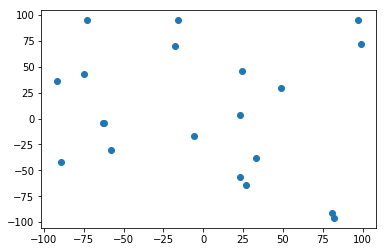

In [3]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [4]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [5]:
import matplotlib.pyplot as plt

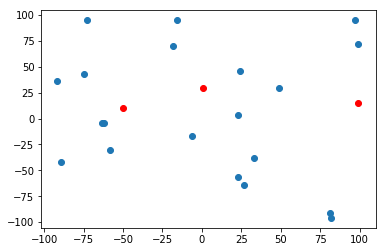

In [6]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro

In [7]:
class Point : 
    """
    坐标点 ： x ， y
    """
    def __init__(self, x, y):
        self.x, self.y = x, y
        
    def to_str(self) : 
        return "({}, {})".format(self.x, self.y)

#  生成所有点   
def gen_points() : 
    points = []      
    for x, y in zip(latitudes, longitude) : 
        points.append(Point(x, y))
    return points

In [8]:
# 获取两点间距离
import math
def distance(p1, p2) : 
#     print("point1 {} => point2 {}".format((p1.x, p1.y), (p2.x, p2.y)))
    return math.sqrt((p2.x - p1.x) ** 2 + (p2.y - p1.y) ** 2)

# 获取线路总距离
def line_distance(lines) : 
    travel_distance = 0
    for index, p1 in enumerate(lines) : 
        if index + 1 < len(lines) : 
            p2 = lines[index + 1] 
            travel_distance += distance(p1, p2)
    return travel_distance

##### 方法一：
    路程问题可以理解为组合问题，通过穷举所有可能的线路组合，并对组合进行排序得到最有解，但组合量太大，通过穷举再排序，性能太低，而且这样计算量太大了

In [1]:
# 穷举所有路线，随机组合，保证每个点出现概率一样
import random
import networkx as nx

def random_points() : 
    i = len(points) - 1
    while i >= 0 : 
        j = random.randint(1, len(points)) % (i + 1)
        points[i], points[j] = points[j], points[i]
        i -= 1    
    return points

In [11]:
# 所有点有多少组合？
def cons() : 
    cons_count = 1
    for i in range(1, len(latitudes) + 1) : 
        cons_count *= i
    
    lines = []
    while cons_count >= 0 : 
        lines.append(random_points())
    return lines

In [12]:
# 排列组合数太大，性能太低，不适用
cons_count = 1
for i in range(1, len(latitudes) + 1) : 
    cons_count *= i

In [13]:
cons_count

2432902008176640000

##### 方法二：
贪心算法，即每次都去最近的点，但回来的距离可能不是最短的，也可能不是最有解
* 先得出一个出发点的解决方法

In [9]:
# 起始出发点
start_x, start_y = chosen_p
start_point = Point(start_x, start_y)
# 开始旅行规划
def travel(start_point) : 
    # 所有候选点
    points = gen_points()
    lines = [start_point]
    start = start_point
    for i in range(1, len(points) + 1) : 
        current_, next_, length = min([[start, p, distance(start_point, p)] for p in points], key = lambda x : x[2])
        lines.append(next_)
        start = next_
        points.remove(next_)
    
    return lines

def print_lines(lines) : 
    print(",".join([str((p.x, p.y)) for p in lines]))

In [10]:
print_lines(travel(start_point))

(-50, 10),(-62, -4),(-63, -4),(-58, -30),(-75, 43),(-92, 36),(-6, -17),(-89, -42),(-18, 70),(23, 3),(24, 46),(-73, 95),(-16, 95),(33, -38),(23, -56),(49, 30),(27, -64),(99, 72),(81, -91),(82, -96),(97, 95)


In [11]:
line_distance(travel(start_point))

1610.0759238758365

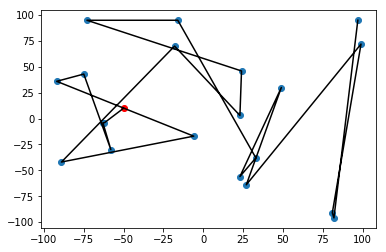

In [12]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
lines = travel(start_point)
x = [point.x for point in lines]
y = [point.y for point in lines]
plt.plot(x, y, color='black')

##### 方法三：
动态规划

In [84]:
import numpy
# 起始出发点
start_x, start_y = chosen_p
start_point = Point(start_x, start_y)
points = gen_points()
points.insert(0, start_point)
    
# 生成距离矩阵
def gen_distace_array() :     
    distance_array = []
    for i in range(len(points)) : 
        distance_i = []
        for j in range(len(points)) : 
            distance_i.append(distance(points[i], points[j]))
        distance_array.append(distance_i)
    return distance_array

distance_array = gen_distace_array()

# T(s, init) = min(T(s - i, i) + dist[i][init])
def tsp(s, init) : 
    print("init : {}".format(init))
    dists = []
    
    if len(s) == 0 : 
        dists.append(0)
    else : 
        for i, p in enumerate(s[init:]) : 
            s.remove(p)
            print("distance_array[{}][{}] : {}".format(i, init, distance_array[i][init]))
            dists.append(tsp(s, i) + distance_array[i][init])
        
    return min(dists)

In [85]:
tsp(points, 0)

init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0
distance_array[0][0] : 0.0
init : 0


ValueError: list.remove(x): x not in list

In [61]:
min([1,2,3,4])

1